In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

In [2]:
df = pd.read_csv('./archive/prep_dataset.csv')

In [3]:
X = df.drop(columns=['pha'])
y = (df['pha'] == 'Y').astype(int)

In [4]:
# Encode the columns using one-hot
X = pd.get_dummies(X, drop_first=True)

In [5]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [6]:
# Try a 2D PCA and visualize it
pca2d = PCA(n_components=2)
X_pca2d = pca2d.fit_transform(X_sc)

In [7]:
X_pca2d.shape

(932335, 2)

In [8]:
import seaborn as sns

In [9]:
pca_vis_df = pd.DataFrame({
    'PCA1' : X_pca2d[:,0],
    'PCA2' : X_pca2d[:,1],
    'pha' : y
})

Text(0.5, 1.0, 'Asteroid Dataset Principle Component Analysis (dims=2)')

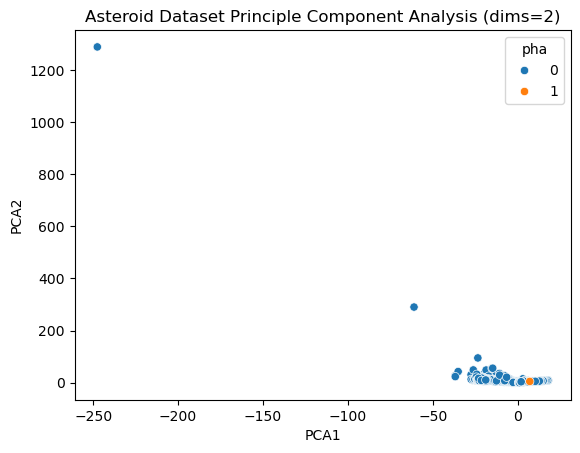

In [10]:
sns.scatterplot(data=pca_vis_df, x='PCA1', y='PCA2', hue='pha')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Asteroid Dataset Principle Component Analysis (dims=2)')

In [11]:
# Let's reduce our data to 5 features
svd5 = TruncatedSVD(n_components=5)
X5 = svd5.fit_transform(X)

In [12]:
svd5.explained_variance_ratio_

array([7.76368763e-06, 9.99992044e-01, 1.86340022e-07, 2.22223697e-09,
       1.96665580e-09])

In [21]:
svd5.singular_values_

array([3.35769092e+09, 2.26055961e+09, 9.75820752e+05, 1.06564400e+05,
       1.00249251e+05])

In [13]:
X5.shape

(932335, 5)

In [14]:
pca5 = PCA(n_components=5)
X_pca5 = pca5.fit_transform(X)

In [15]:
pca5.explained_variance_ratio_

array([9.99999468e-01, 4.65266085e-07, 6.05823629e-08, 2.22223652e-09,
       1.96657338e-09])

In [22]:
pca5.singular_values_

array([2.26056419e+09, 1.54194065e+06, 5.56403770e+05, 1.06564389e+05,
       1.00247151e+05])

In [23]:
pca5.feature_names_in_

array(['H', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp',
       'per', 'moid', 'rms', 'neo_Y', 'class_APO', 'class_AST',
       'class_ATE', 'class_CEN', 'class_IEO', 'class_IMB', 'class_MBA',
       'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO'], dtype=object)